# Modelo de Solow

Desarrollaremos un modelo de Solow simple, para observar el proceso de acumulación de capital, dados los parámetros que caracterizan una economía ficticia. 

## Función de producción

Esta economía tiene una función de produción dependiente del factor trabajo, capital, y tecnología variable de período a período (progreso tecnico neutral de Harrod)

$$ Y_{t} = K_{t}^{\alpha} \left( A_{t} L_{t} \right)^{1-\alpha} $$

Donde
* $Y_{t}$ es la producción en el período $t$
* $A_{t}$ es el factor tecnológico en el período $t$
* $K_{t}$ es el stock de capital en el período $t$
* $L_{t}$ es el trabajo empleado en el período $t$


## Supuestos sobre el progreso de las variables

Modelamos el progreso de las variables trabajo y tecnología de la siguiente manera:

* $L_{t+1} = (1+n)L_{t}$
* $A_{t+1} = (1+g)A_{t}$

## Acumulación de capital

El capital se acumulará en base a la siguiente ley:

$$ K_{t+1} = (1-\delta)K_{t} + I_{t}$$

Donde:

* $\delta$ es la tasa de depreciación del capital
* $I_{t}$ es la inversión en el período $t$

## Modelando la inversión

Supondremos para simplificar que existe una propensión marginal al ahorro $s$ constante ($1-s$ es la propensión marginal al consumo), de manera que:

$$ S_{t} = sY_{t}$$

Luego, al distribuirse el producto entre consumo e inversión, ésta finalmente es igual al ahorro:

\begin{align*}
Y_t &= sY_t + (1-s)Y_t \\
    &= S_t + C_t = C_t + I_t \\
\Rightarrow S_t &= I_t
\end{align*}

## Ecuación de Solow

Encontraremos el capital por unidad de trabajo efectivo, para calcular su estado estacionario y el proceso de acumulación de equilibrio

### Definición de variables

* Sea $ \widetilde{k_{t}} $ el capital por unidad de trabajo efectivo, es decir:
$$ \widetilde{k_{t}} = \dfrac{K_{t}}{A_{t}L_{t}} $$

* Sea $ \widetilde{y_{t}} $ el producto por unidad de trabajo efectivo, es decir:
$$ \widetilde{y_{t}} = \dfrac{Y_{t}}{A_{t}L_{t}} $$

### La ecuación de Solow

Podemos escribir el proceso de acumulación de capital con estas nuevas definiciones, obteniendo:

$$  \Delta \widetilde{k_{t+1}} = \dfrac{1}{(1+n)(1+g)} \left[ s \widetilde{k_{t}}^\alpha - \widetilde{k_{t}}(n+g+ng+\delta)  \right] $$

### El estado estacionario

Resolviendo $\Delta \widetilde{k_{t+1}} = 0$, tenemos que:

$$ \widetilde{k^{SS}} = \left[ \dfrac{s}{n+g+ng+\delta} \right]^{\dfrac{1}{1-\alpha}} $$

## Ejemplo

Hagamos un ejemplo, definiendo los valores para los parámetros:

* $\widetilde{k_{0}} = 0.1$ (valor inicial de capital por unidad de trabajo efectiva)
* $\alpha = 0.2$
* $\delta = 0.1$
* $n = 0.1 $
* $g = 0.2$ 
* $s = 0.2$

In [1]:
%%capture
!pip install gif

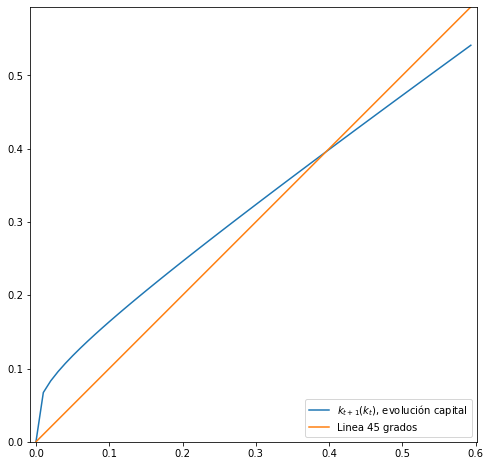

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# Parámetros
k0 = 0.6
α  = 0.2
δ  = 0.1
n  = 0.1
g  = 0.2
s  = 0.2 
t  = 60  # cantidad de periodos a simular

# Ecuación de Solow
def solow(k0, α, δ, n, g, s, t):
    
    ss = (s/(n+g+n*g+δ))**(1/(1-α))

    kt  = np.linspace(start=0, stop=ss*1.5, num=t)
    kt1 = (s*kt**α + (1-δ)*kt)/((1+n)*(1+g))
    

    # Capital en camino al estado estacionario
    k_path = np.repeat(np.nan, t)
    k_path[0] = k0
    for i in range(1, t):
        k_path[i] = (s*k_path[i-1]**α + (1-δ)*k_path[i-1])/((1+n)*(1+g))

    # T del estado estacionario
    t_ss = 0
    for j in range(1,t):
        if k_path[j] == k_path[j-1]:
            t_ss = j
            break

    return {"kt": kt, "kt1": kt1, "k_path": k_path, "t_ss": t_ss, "ss": ss}

Kt, Kt1, K, t_ss, ss = solow(k0, α, δ, n, g, s, t).values()


kt1 = K[1:len(K)]
kt  = K[0:len(K)-1]

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.plot(Kt, Kt1, label=r"$k_{t+1}(k_t)$, evolución capital")
plt.plot(Kt, Kt, label="Linea 45 grados")
plt.xlim(0, ss*1.5)
plt.ylim(0, kt1[len(kt1)-1]*1.5)
plt.legend(loc="lower right")
plt.show()

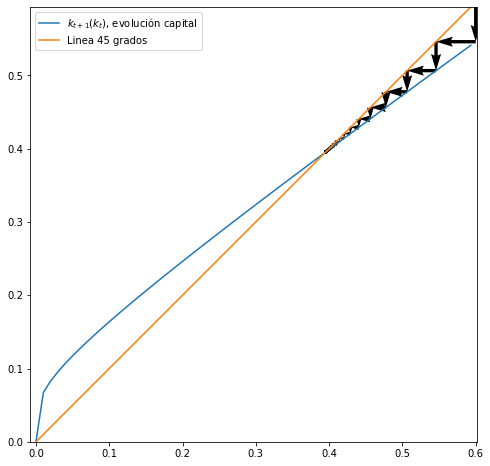

In [3]:
# Movimientos del capital. Empezamos desde k0

u1 = np.repeat(0, len(kt1))
v1 = kt1-kt
u2 = kt1-kt
v2 = np.repeat(0, len(kt1))

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.plot(Kt, Kt1, label=r"$k_{t+1}(k_t)$, evolución capital")
plt.plot(Kt, Kt, label="Linea 45 grados")
plt.xlim(0, ss*1.5)
plt.ylim(0, kt1[len(kt1)-1]*1.5)
plt.quiver(kt, kt, u1, v1, scale=1, units='xy', color = "k")
plt.quiver(kt, kt1, u2, v2, scale=1, units='xy', color = "k")
plt.legend()
plt.show()

In [4]:
# Animación de la evolución del capital

import gif

@gif.frame
def plot(i):
    
    global kt1
    global kt
    global Kt
    global Kt1

    u_1 = np.repeat(0.0, len(kt1))
    v_1 = np.repeat(0.0, len(kt1))
    u_2 = np.repeat(0.0, len(kt1))
    v_2 = np.repeat(0.0, len(kt1))

    for j in range(i+1):
        v_1[j+1] = kt1[j+1] - kt[j+1]
        u_2[j] = kt1[j] - kt[j]

    plt.figure(figsize=(12,8))
    plt.axis('equal')
    plt.plot(Kt, Kt1, label=r"$k_{t+1}(k_t)$, evolución capital")
    plt.plot(Kt, Kt, label="Linea 45 grados")
    plt.xlim(0, ss*1.5)
    plt.ylim(0, kt1[len(kt1)-1]*1.5)
    plt.legend(loc="lower right")
    plt.quiver(kt, kt, u_1, v_1, scale=1, units='xy', color = "k")
    plt.quiver(kt, kt1, u_2, v_2, scale=1, units='xy', color = "k")

frames = []
for t in range(20):
    frame = plot(t)
    frames.append(frame)

gif.save(frames,"example.gif", duration=100)

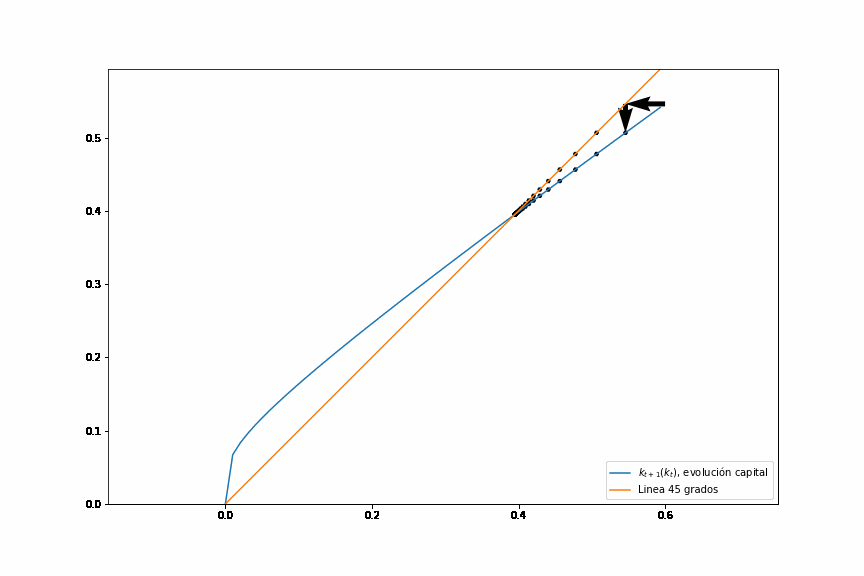

In [5]:
from IPython.display import Image
Image(open('example.gif','rb').read())

# Modelo de Solow con capital humano

En esta sección, utilizaremos el mismo modelo anterior, salvo que en esta ocasión, la función de producción contiene como factor el capital humano $H_{t}$, por lo tanto, nuestra función queda:

$$ Y_{t} = K_{t}^{\alpha} H_{t}^{\varphi} (A_{t} L_{t})^{1-\alpha-\varphi} $$

## Modelando capital humano
Como el capital humano es propio de los trabajadores contratados, podemos modelarlo de la siguiente forma:

$$ H_{t} = h_{t} L_{t}$$

Donde $h_{t}$ es el promedio de capital humano por trabajador. Reemplazando esto en la función de producción, tenemos:

$$ Y_{t} = K_{t}^{\alpha} h_{t}^{\varphi} A_{t}^{1-\alpha-\varphi} L_{t}^{1-\alpha} $$

Adicionalmente, definimos el proceso de acumulación de capital humano de una forma similar al capital físico (asumiendo que ambos se deprecian a la misma tasa):

\begin{align*}
  H_{t+1} &= I_{H} + (1-\delta)H_{t} \\
  K_{t+1} &= I_{K} + (1-\delta)K_{t}
\end{align*}

Con:
$$ I_{j} = s_{j}Y_{t} \: , \: j = \{ H,K \} $$

## Ecuación de Solow con capital humano

Utilizando la misma notación y procedimiento anterior, podemos obtener:

\begin{align*}
  \widetilde{k_{t+1}} &= \dfrac{1}{(1+n)(1+g)} \left[ s_{K} \widetilde{k_{t}}^{\alpha} \widetilde{h_{t}}^{\varphi} + (1-\delta) \widetilde{k_{t}} \right] \\
  \widetilde{h_{t+1}} &= \dfrac{1}{(1+n)(1+g)} \left[ s_{H} \widetilde{k_{t}}^{\alpha} \widetilde{h_{t}}^{\varphi} + (1-\delta) \widetilde{h_{t}} \right]
\end{align*}

### Las ecuaciones de Solow con capital humano

Ahora es posible obtener las funciones en diferencia:

\begin{align*}
  \Delta \widetilde{k_{t+1}} &= \dfrac{1}{(1+n)(1+g)} \left[ s_{K} \widetilde{k_{t}}^{\alpha} \widetilde{h_{t}}^{\varphi} - (n + g + ng + \delta) \widetilde{k_{t}} \right] \\
  \Delta \widetilde{h_{t+1}} &= \dfrac{1}{(1+n)(1+g)} \left[ s_{H} \widetilde{k_{t}}^{\alpha} \widetilde{h_{t}}^{\varphi} - (n+g+ng+\delta) \widetilde{h_{t}} \right]
\end{align*}

### El estado estacionario
Resolviendo $ \Delta \widetilde{k_{t+1}} = \Delta \widetilde{h_{t+1}} = 0 $, tenemos:

\begin{align*}
  \widetilde{k^{SS}} &= \left[ \dfrac{s_{K}^{1-\varphi} s_{H}^{\varphi} }{n+g+ng+\delta} \right]^{\dfrac{1}{1-\alpha-\varphi}} \\
  \widetilde{h^{SS}} &= \left[ \dfrac{s_{K}^{\alpha} s_{H}^{1-\alpha} }{n+g+ng+\delta} \right]^{\dfrac{1}{1-\alpha-\varphi}} \\
\end{align*}


## Ejemplo

Hagamos un ejemplo, definiendo los valores para los parámetros:

* $\widetilde{k_{0}} = 16$
* $\widetilde{h_{0}} = 2$
* $\alpha = 1/3$
* $\varphi = 1/3$
* $\delta = 0.06$
* $n = 0 $
* $g = 0.015$ 
* $s_{K} = 0.2$
* $s_{H} = 0.15$

El objetivo será observar la convergencia al estado estacionario en un diagrama de fase

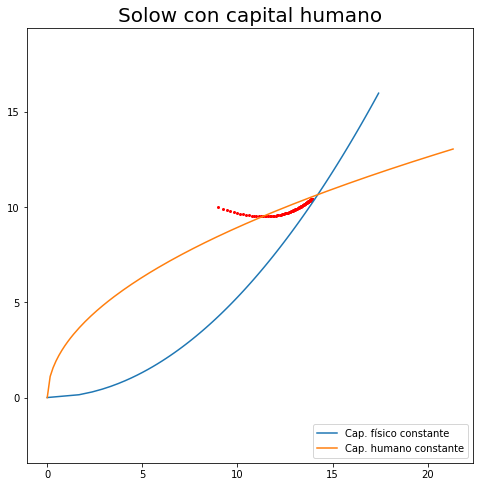

In [6]:
from matplotlib import pyplot as plt
import numpy as np

# Parámetros
k0 = 9
h0 = 10
α  = 1/3
ϕ  = 1/3
δ  = 0.06
n  = 0.0
g  = 0.015
sk = 0.2
sh = 0.15
t  = 100

# Ecuación de Solow
def solow_humancap(k0, h0, α, ϕ, δ, n, g, sk, sh, t):

    ssk = (((sk**(1-ϕ)) * (sh**ϕ)) / ((n+g+n*g+δ))) ** ( 1/(1-α-ϕ) ) # Estado estacionario capital fisico
    ssh = (((sk**α) * (sh**(1-α))) / ((n+g+n*g+δ))) ** ( 1/(1-α-ϕ) ) # Estado estacionario capital humano

    lk  = np.linspace(start=0, stop=1.5*ssh, num=10*int(round(ssh))) # Grilla capital fisico
    lh  = np.linspace(start=0, stop=1.5*ssk, num=10*int(round(ssk))) # Grilla capital humano

    ktf = ( (sk*lk**ϕ) / (n+g+n*g+δ) )**( 1 / (1-α) ) # Capital fisico constante en funcion del capital humano
    htf = ( (sh*lh**α) / (n+g+n*g+δ) )**( 1 / (1-ϕ) ) # Capital humano constante en funcion del capital fisico
    
    # Capital en camino al estado estacionario
    k_path = np.repeat(np.nan, t)
    h_path = np.repeat(np.nan, t)
    
    k_path[0] = k0
    h_path[0] = h0
    for i in range(1, t):
        k_path[i] = (sk * k_path[i-1]**α * h_path[i-1]**ϕ + (1-δ)*k_path[i-1])/((1+n)*(1+g))
        h_path[i] = (sh * k_path[i-1]**α * h_path[i-1]**ϕ + (1-δ)*h_path[i-1])/((1+n)*(1+g))

    # T del estado estacionario
    t_ss = 0
    for j in range(1,t):
        if (k_path[j] == k_path[j-1]) and (h_path[j] == h_path[j-1]) :
            t_ss = j
            break

    return {"longitud_k": lk, "longitud_h": lh, "ktf": ktf, "htf": htf, "k_path": k_path, "h_path": h_path, "t_ss": t_ss, "ssk": ssk, "ssh": ssh}

lk, lh, ktf, htf, k_path, h_path, t_ss, ssk, ssh = solow_humancap(k0, h0, α, ϕ, δ, n, g, sk, sh, t).values()

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title("Solow con capital humano", fontsize = 20)
plt.plot(ktf, lk, label="Cap. físico constante")
plt.plot(lh, htf, label="Cap. humano constante")
plt.scatter(k_path, h_path, s = 4, c="r")
plt.legend(loc="lower right")
plt.show()